## Definition
The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed

### Let's try to prove this

# Central Limit Theorem in action

### Part 1 : Imports

In [215]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
from math import factorial
import math
from scipy.stats import norm

### Part 2 : Sample data generation

In [160]:
def plot_sample(data, bins, title):
    plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
    plt.hist(data, bins=bins, alpha=0.6, color='b')
    plt.gca().set(title=title, ylabel='Frequency');

#### Uniform Distribution

In [161]:
def generate_uniform(a, b, count = 1000):
    return np.arange(a,b,(b-a)/count)

##### Example of Uniform Distribution using our function

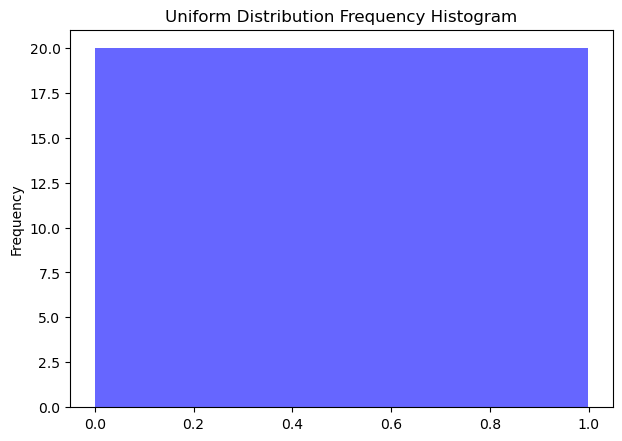

In [162]:
data = generate_uniform(0,1)
plot_sample(data, 50, 'Uniform Distribution Frequency Histogram')

#### Binomial Distribution

In [163]:
def generate_binomial(trials, propability, count = 1000):
    return np.random.binomial(trials, propability, count)

##### Example of Binomial Distribution using our function

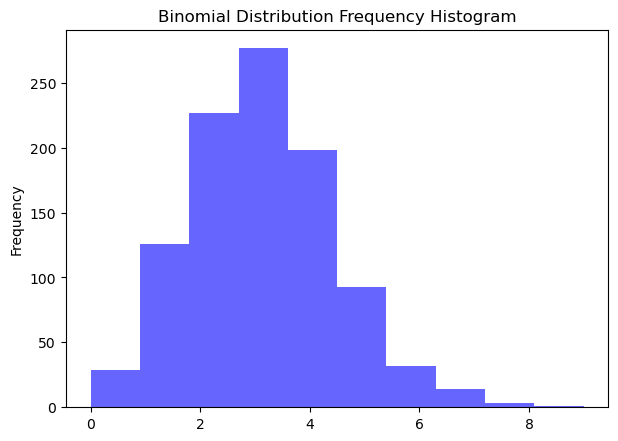

In [165]:
coin_flips = 10
probability = 0.3
data = generate_binomial(coin_flips,probability)
plot_sample(data, 10, 'Binomial Distribution Frequency Histogram')

This is the example of Coin Flip 
We flip a coin 10 times
The probability of getting a head is 0.3 (This is a biased coin)
We repeat this experiment 1000 times

As we can see, in the majority of cases, we receive around 2 to 3 heads

#### Normal Distribution

In [166]:
def generate_normal(my, sigma, count = 1000):
    return np.random.normal(mu, sigma, count)

##### Example of Normal Distribution using our function

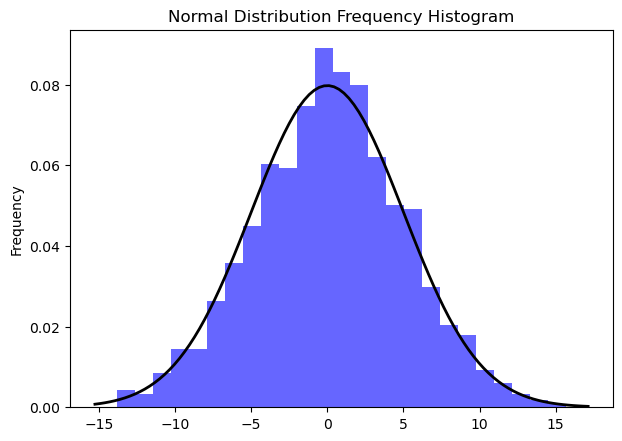

In [167]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

mu = 0
sigma = 5

data = generate_normal(mu, sigma)
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
  
plt.plot(x, p, 'k', linewidth=2)
plt.gca().set(title='Normal Distribution Frequency Histogram', ylabel='Frequency');

#### Poisson Distribution

In [168]:
def generate_poission(lam, count=10000):
    return np.random.poisson(lam, count)

##### Example of Poission Distribution using our function

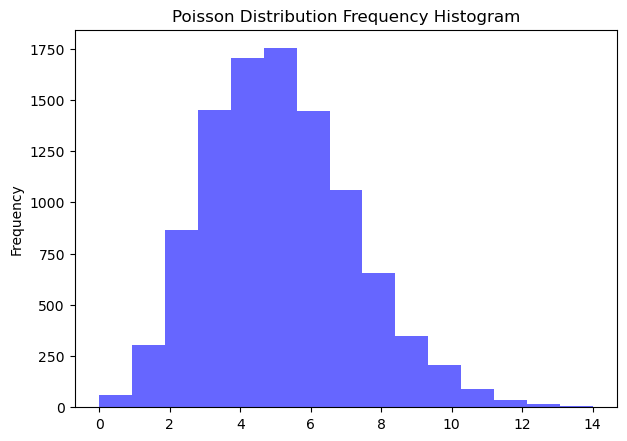

In [169]:
lam = 5

data = generate_poission(lam)
plot_sample(data, 15, 'Poisson Distribution Frequency Histogram')

#### Exponential Distribution

In [170]:
def generate_exponential(scale, count = 10000):
    return np.random.exponential(scale, count)

##### Example of Exponential Distribution using our function

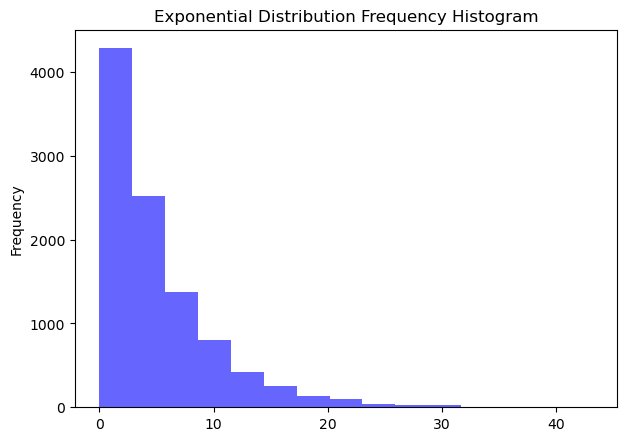

In [171]:
scale = 5

data = generate_exponential(scale)
plot_sample(data, 15, 'Exponential Distribution Frequency Histogram')

### Sampling Data

#### Generate a random sample from provided array

In [172]:
def get_sample(data):
    size = int(len(data)/10)
    return np.random.choice(data, size)

#### Plot the provided distribution, and the distribution of the average across 10000 random sampling

In [176]:
def plot_histo(ax, data, bins=5, color='g', alpha=0.6, label = None):
    ax.hist(data, bins=bins, color = color, alpha = alpha, label = label,density=True)
    if label != None:
        ax.legend()
    return ax
    
def plot_normal_curve(ax, data, label = None):
    mu, std = norm.fit(data) 
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2, label = label)
    if label != None:
        ax.legend()
    return ax

def plot(distribution, data, bins=50):
    averages = [ np.average(get_sample(data)) for i in range(10000) ]
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    ax[0] = plot_histo(ax[0],data, bins=bins, label = f'{distribution} Data')
    ax[0].set_ylabel("Frequency")
    ax[0].set_title(f"{distribution} Data")
    ax[1] = plot_histo(ax[1],averages, bins=bins, label = f'Average of {distribution} Data')
    ax[1] = plot_normal_curve(ax[1], averages, label = 'Normal Distribution Curve')
    ax[1].set_ylabel("Frequency")
    ax[1].set_title(f"Average of {distribution} Data")

#### Uniform Distribution

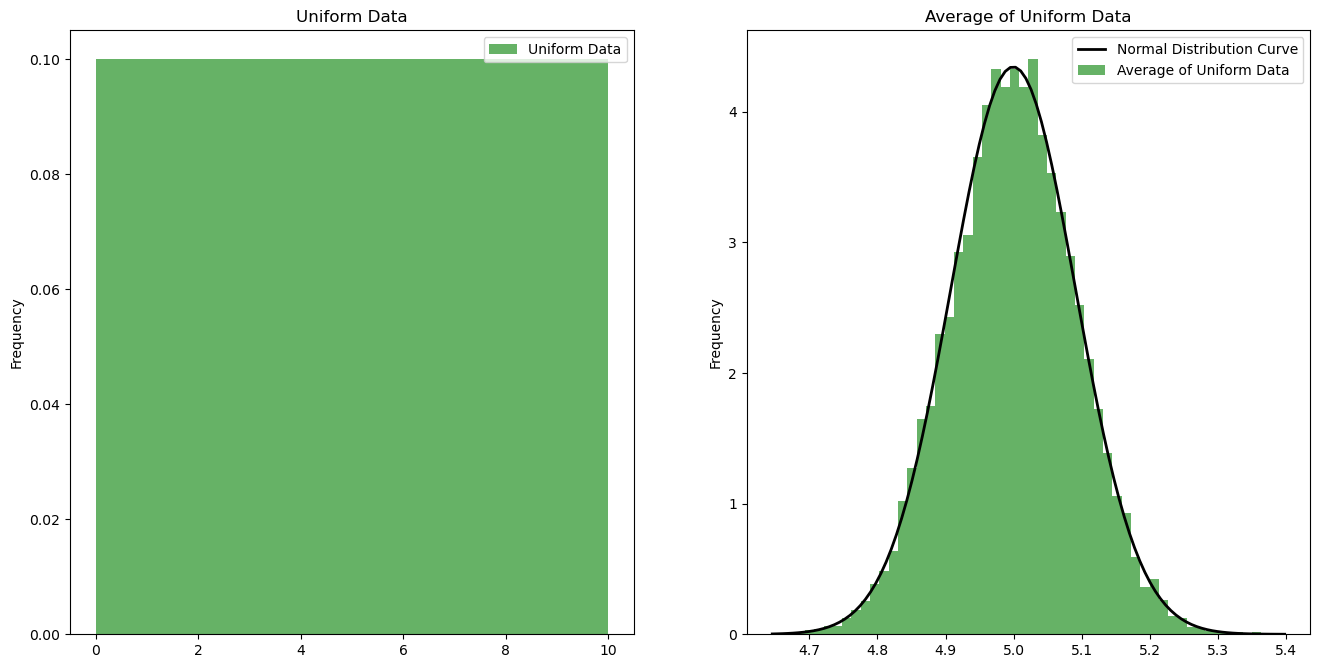

In [177]:
data = generate_uniform(0,10,10000)
plot('Uniform', data)

#### Binomial Distribution

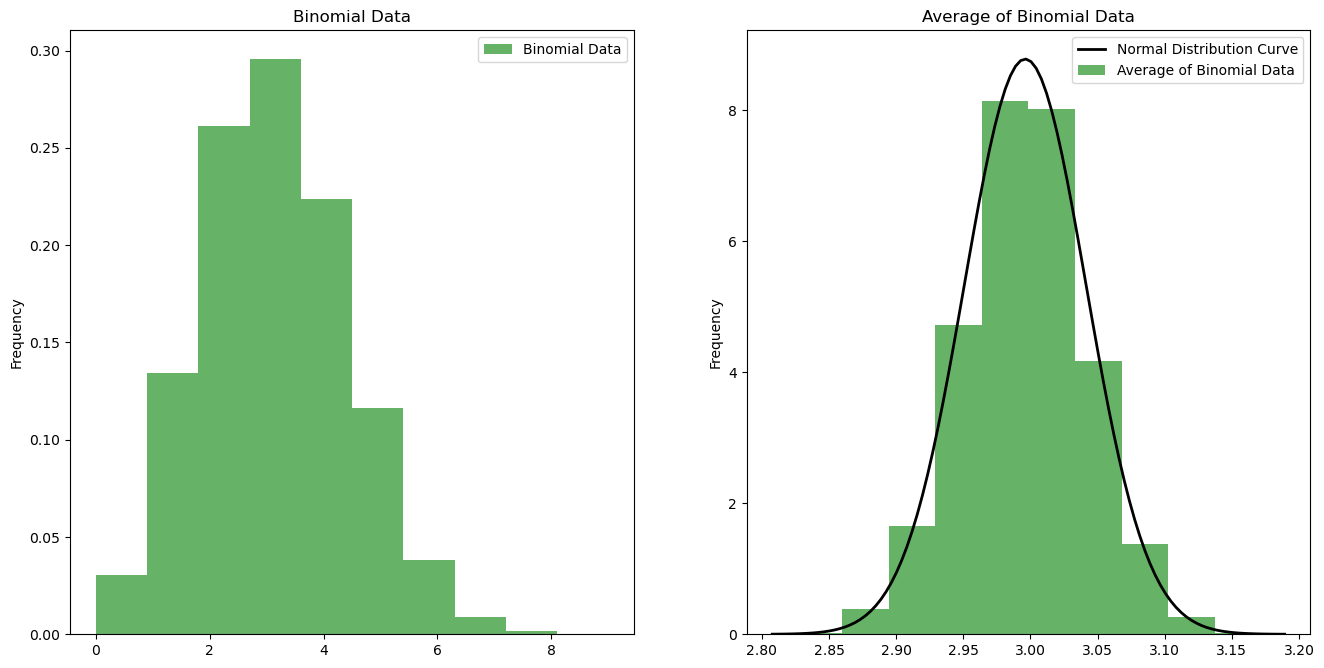

In [179]:
coin_flips = 10
probability = 0.3

data = generate_binomial(coin_flips,probability,10000)
plot('Binomial', data, 10)

##### What is interesting in this case, is the mean (μ) of the average data. It is 3 ( = 10 * 0.3 )
Let's try again with another probability 0.7 and coin_flips = 20

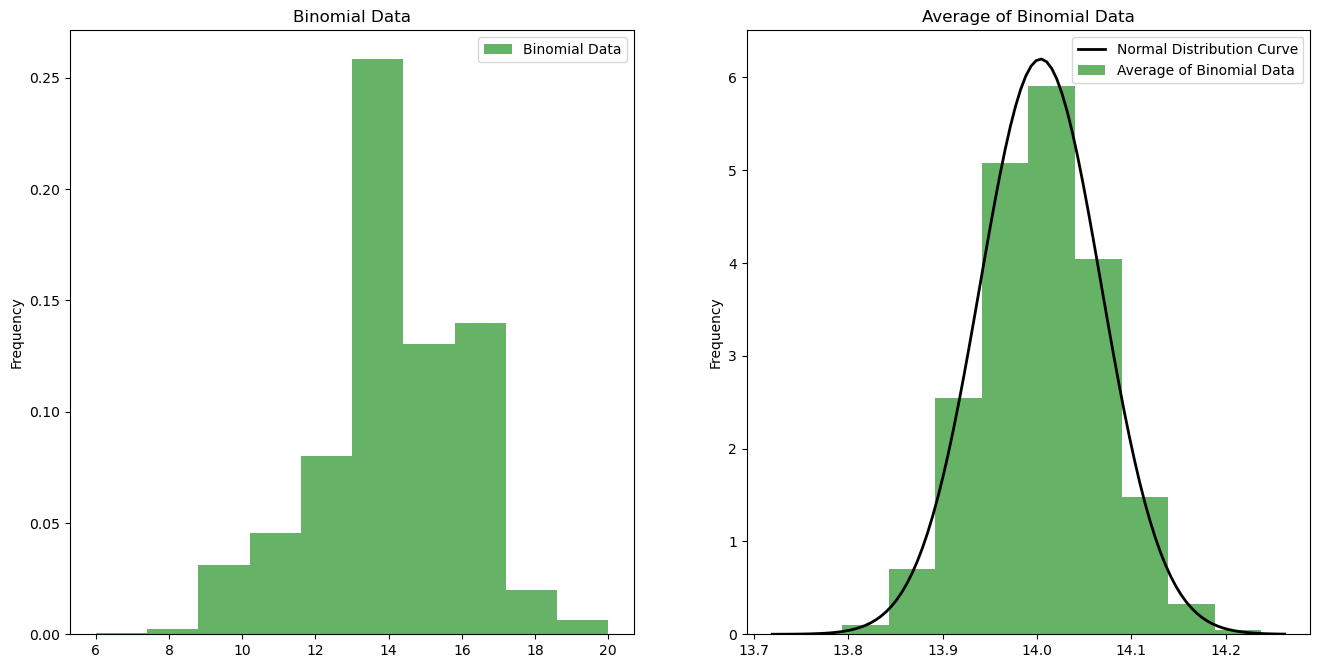

In [180]:
coin_flips = 20
probability = 0.7

data = generate_binomial(coin_flips,probability,10000)
plot('Binomial', data, 10)

Again, the mean is around 14 ( = 20 * 0.7 ). <br><b style="color:red">This can be used as a way to estimate p, the binomial probability of a dataset, knowing the number of trials, and vice versa</b> 

#### Normal Distribution

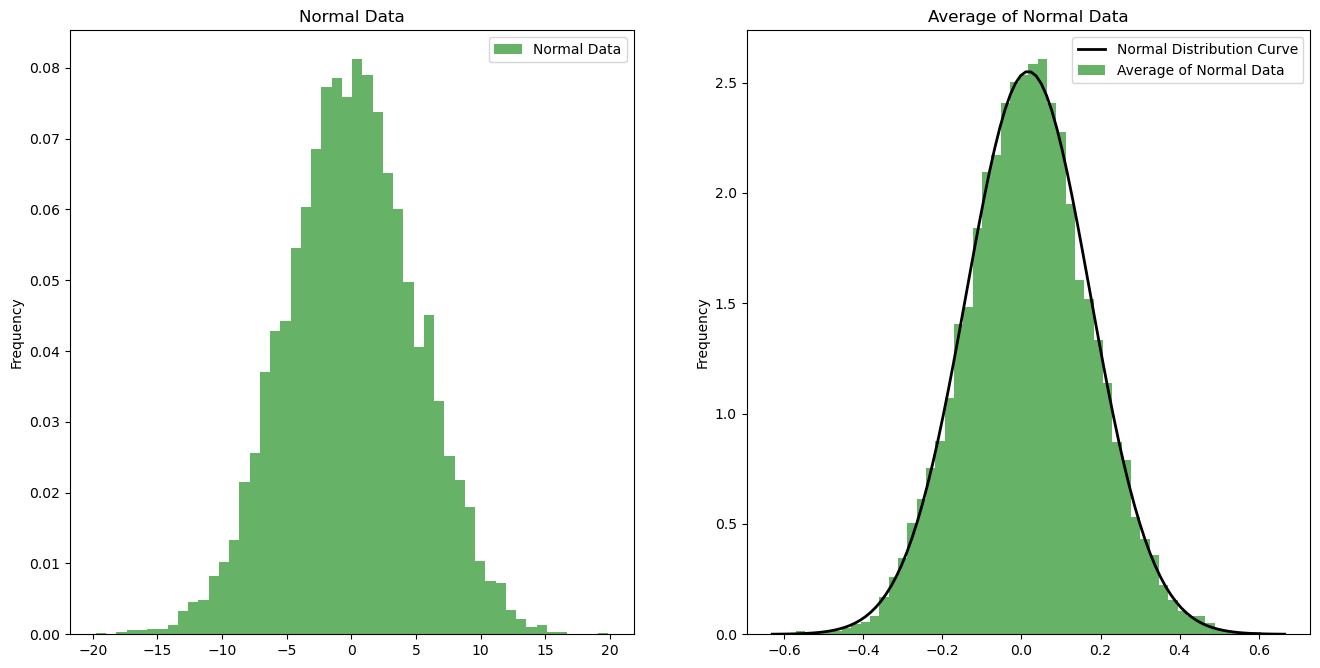

In [181]:
mu = 0
sigma = 5

data = generate_normal(mu, sigma, 10000)
plot('Normal', data)

#### Poisson Distribution

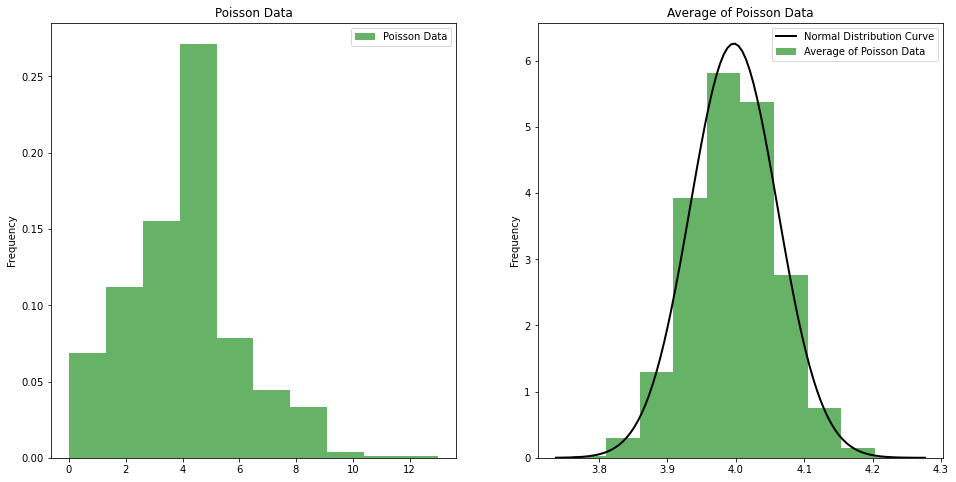

In [191]:
lam = 4

data = generate_poission(lam, 10000)
plot('Poisson', data, 10)

<b style="color:red">We also notice in this case, that the mean μ is = 4 (The lambda we used)</b>

##### Let's try to estimate the value of e (euler's number) using CLT 

We know that 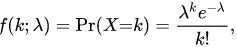

We also know, thanks to the central limit theorem, that with enough sampling, the average sample will be around the mean.
Using this knowledge, we will take n samples from our generated data, and for each sample
1. get the number of items between lam - 0.5 and lam + 0.5
2. divide this number by the total size of the sample, to get an approximate of Pr(X=λ)
3. Knowing Pr(X=λ), calculate the value of e
4. Get the average value of e, and check how close it is to the actual value of e

In [234]:
def estimate_e(n, data):
    e_estimated = 0
    for i in range(n):
        sample = get_sample(data)
        prλ = ( ( (lam - 0.5) < sample) & (sample < (lam + 0.5) ) ).sum() / len(sample)
        e_estimated_local = 1 / ( prλ * factorial(lam) / lam**lam)
        e_estimated += e_estimated_local ** (1/lam)
    return e_estimated / n

In [235]:
n = 10
e_estimated = estimate_e(n, data)

print(f'Estimated value of e is {e_estimated}')
print(f'Actual value of e is {math.e}')
print(f'Difference is {(e_estimated) - math.e}')

print('\nLet''s try using a bigger n\n')

n = 1000
e_estimated = estimate_e(n, data)

print(f'Estimated value of e is {e_estimated}')
print(f'Actual value of e is {math.e}')
print(f'Difference is {(e_estimated) - math.e}')


Estimated value of e is 2.7658544065649204
Actual value of e is 2.718281828459045
Difference is 0.04757257810587534

Lets try using a bigger n

Estimated value of e is 2.72477352460172
Actual value of e is 2.718281828459045
Difference is 0.006491696142675085


<b style="color:red">As we increase the sampling size, we get a closer and closer value of e<b>

#### Exponential Distribution

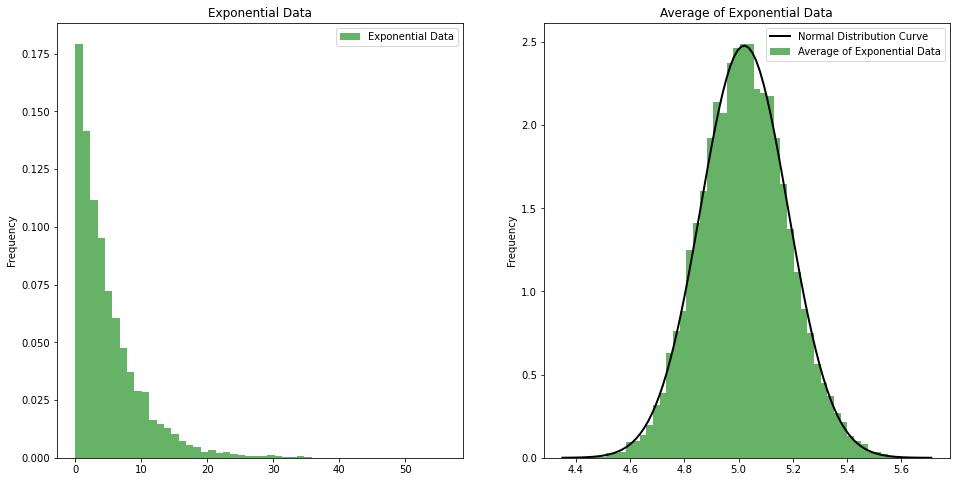

In [236]:
scale = 5

data = generate_exponential(scale)
plot('Exponential', data)

##### What is interesting in this case, is the mean (μ) of the average data. It is 5 ( The scale of our exponential distribution data generation )